<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [2]:
import pandas as pd

yelp = pd.read_json('./data/review_sample.json', lines=True)

In [3]:
yelp.head(10)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA
5,Db3CfZWrtG33UZSs8Tdlsg,1,2016-10-23 22:43:56,1,nXYV_0joQEMXYAfNyOPsRw,4,"Tasty, fast casual Latin street food. The men...",1,Gjz2PCbLZ6midk1n_0LaUg
6,gJhMeq2nVH27tz8LqbD3eQ,0,2013-05-20 19:09:43,0,ZA7SRi6fTRWwpo-B9O72qQ,5,This show is absolutely amazing!! What an incr...,0,BeKPVuqX-2at4izqVwUFEg
7,Yt5gK4E9NqVa14WNiQdBlQ,0,2018-07-12 01:19:53,0,4_GnHPkyTirzK6onIKO4jw,4,Came for the Pho and really enjoyed it! We go...,0,PuXpIJzTBQejeBZh9hwynQ
8,c7WsC8SbUcLyZkREzx9dGA,1,2017-09-27 22:10:26,0,XGGHc7pYgOm5s6SWr8NMXA,5,Absolutely the most Unique experience in a nai...,0,NVVknS1I51z8wY5NNrJ6vQ
9,NSifXpsCRvnsBRqrHF9CJA,0,2015-01-25 08:43:15,0,--e66tyhwCE6eoRmcK2w8g,1,Wow. I walked in and sat at the bar for 10 min...,2,J7MsJKJDSA5OGo2-Hn7MbA


## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [5]:
import spacy
import re

nlp = spacy.load('en_core_web_lg') 

{(ent.text.strip(), ent.label_) for ent in sp_lg(document).ents}

stop_words = nlp.Defaults.stop_words.union(['food', 'place', 'restaurant'])

def tokenize(doc):
    
    lemmas = []
    
    
    
    doc = doc.lower()
    doc = re.sub('[^a-zA-Z 0-9]', '', doc)
    doc = nlp(doc)
    
    for token in doc:
        conditions = (token.text.lower() not in stop_words) and (token.is_punct == False) and (token.pos_ != 'PRON') 
        if conditions:
            lemmas.append(token.lemma_)
    
    return lemmas



In [6]:
yelp['tokens'] = yelp['text'].apply(tokenize)

In [7]:
yelp.head(10)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,tokens
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w,"[beware, fake, fake, fakewe, small, business, ..."
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA,"[come, lunch, togo, service, quick, staff, fri..."
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA,"[have, vegas, dozen, time, step, foot, circus,..."
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ,"[go, night, close, street, party, good, actual..."
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA,"[35, 4, starsnot, bad, price, 1299, lunch, sen..."
5,Db3CfZWrtG33UZSs8Tdlsg,1,2016-10-23 22:43:56,1,nXYV_0joQEMXYAfNyOPsRw,4,"Tasty, fast casual Latin street food. The men...",1,Gjz2PCbLZ6midk1n_0LaUg,"[tasty, fast, casual, latin, street, , menu, ..."
6,gJhMeq2nVH27tz8LqbD3eQ,0,2013-05-20 19:09:43,0,ZA7SRi6fTRWwpo-B9O72qQ,5,This show is absolutely amazing!! What an incr...,0,BeKPVuqX-2at4izqVwUFEg,"[absolutely, amazing, incredible, production, ..."
7,Yt5gK4E9NqVa14WNiQdBlQ,0,2018-07-12 01:19:53,0,4_GnHPkyTirzK6onIKO4jw,4,Came for the Pho and really enjoyed it! We go...,0,PuXpIJzTBQejeBZh9hwynQ,"[come, pho, enjoy, , get, 900pm, busy, get, s..."
8,c7WsC8SbUcLyZkREzx9dGA,1,2017-09-27 22:10:26,0,XGGHc7pYgOm5s6SWr8NMXA,5,Absolutely the most Unique experience in a nai...,0,NVVknS1I51z8wY5NNrJ6vQ,"[absolutely, unique, experience, nail, shop, f..."
9,NSifXpsCRvnsBRqrHF9CJA,0,2015-01-25 08:43:15,0,--e66tyhwCE6eoRmcK2w8g,1,Wow. I walked in and sat at the bar for 10 min...,2,J7MsJKJDSA5OGo2-Hn7MbA,"[wow, walk, sit, bar, 10, minute, bartender, w..."


## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
tfidf = TfidfVectorizer(stop_words=stop_words,  
                        ngram_range=(1,2),
                        max_features = 8000,
                        tokenizer=tokenize)

In [11]:
tfidf.fit(yelp['text'])

/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['d', 'm', 'nt', 's', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=8000,
                min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words={"'d", "'ll", "'m", "'re", "'s", "'ve", 'a', 'about',
                            'above', 'across', 'after', 'afterwards', 'again',
                            'against', 'all', 'almost', 'alone', 'along',
                            'already', 'also', 'although', 'always', 'am',
                            'among', 'amongst', 'amount', 'an', 'and',
                            'another', 'any', ...},
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function tokenize at 0x11ba03e18>, use_idf=True,
                vocabulary=None)

In [12]:
dtm = tfidf.transform(yelp['text'])

In [13]:
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

In [14]:
dtm.head(10)

,,,,,,good,great,1,10,12,...,yum,yummy,yummy,yup,z,zero,zero star,zone,zoo,zucchini
0,0.159334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.049609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.098148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.251470,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.405652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.072213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=10, algorithm='kd_tree')

knn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [16]:
fake = ["""
        This place is great! The food, atmosphere, and music were all amazing!
        """]

In [17]:
new = tfidf.transform(fake)

In [18]:
knn.kneighbors(new.todense())

(array([[0.98209434, 1.        , 1.00717032, 1.03172176, 1.03971097,
         1.04798491, 1.084598  , 1.09170357, 1.09967636, 1.10207121]]),
 array([[2412, 6311, 1192, 7594, 4466, 5621, 6211, 2803, 7898, 4545]]))

In [19]:
yelp.iloc[2412]['text']

"Loving the vibe here. Live music, local ingredients, everything is made from scratch and it's got a great atmosphere."

In [20]:
yelp.iloc[6311]['text']

'天氣很熱吃不下東西，今天我點了一個韓國冷面湯、餐後點了甜點，冰沙系列不會太甜膩，覺得店家很用心製作，包含擺盤精緻、佐料衛生，夏日想開胃，這是一個不錯的選擇，服務人員也很敬業，以後會常常來'

In [21]:
yelp.iloc[1192]['text']

'This place is so cute! It has a great atmosphere, the staff is really friendly and the food is great!'

In [22]:
yelp.iloc[7594]['text']

'Great place to hang out SteveO is awesome and makes you feel very welcomed....been here before and will be back more often. Great music and a great atmosphere. Food was great and the drinks were even better. Good times!'

In [23]:
yelp.iloc[4466]['text']

'Great atmosphere and Dr. Murphy is really good with kids! He is working on my 2nd daughter now!'

In [24]:
yelp.iloc[5621]['text']

"First time here! Great atmosphere, great music, delicious cocktails! Expanding at the moment, can't wait until it's done! Kitchen coming!"

In [25]:
yelp.iloc[6211]['text']

'Great food, atmosphere and staff except for the host. He was so rude! Loved our waiter and all the other servers!  The food was great! The patio was also great and well lit and heated.'

In [26]:
yelp.iloc[2803]['text']

'. Great atmosphere. Cool people! Always have exactly what we need and never have to deal with huddle od taking to long to get produxt'

In [27]:
yelp.iloc[7898]['text']

'First time eating here. I was impressed. Great Atmosphere, great food and our server Jeannette was fantastic.'

In [28]:
yelp.iloc[4545]['text']

"Amazing food with a great atmosphere.  \nOur favorite is sitting outside enjoying the patio.  \n\nWe siggest ordering different dishes and sharing.  That way you get to try different dishes, because they're all great.   \n\nThey had live music during the day Sunday.  Really enjoyed that.  \n\nI definitely recommend it.  Especially because Mesa seems to be lacking in restaurants with great atmosphere and food."

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

clf = RandomForestClassifier()

pipe = Pipeline([('tfidf', tfidf), ('clf', clf)])

In [30]:
yelp['stars'].dtype

dtype('int64')

In [31]:
yelp['stars'].value_counts(normalize=True)

5    0.4462
4    0.2185
1    0.1496
3    0.1098
2    0.0759
Name: stars, dtype: float64

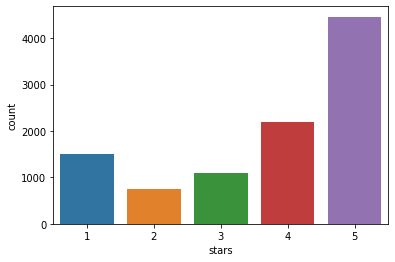

In [32]:
import seaborn as sns

sns.countplot(yelp['stars']);

In [47]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'tfidf__max_features': (500, 1000)
}

grid_search = GridSearchCV(pipe, parameters, cv=2, n_jobs=-1, verbose=1)

grid_search.fit(yelp['text'], yelp['stars'])

Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  2.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  2.2min finished
/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['d', 'm', 'nt', 's', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


GridSearchCV(cv=2, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=8000,
                                                        min_df=1,
                                                        ngram_range=(1, 2),
                                                        n

In [48]:
print(grid_search.predict(fake))

[5]


## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Keep the `iterations` parameter at or below 5 to reduce run time
    - The `workers` parameter should match the number of physical cores on your machine.
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [49]:
import gensim
from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore
from gensim.models import LdaMulticore
from gensim.corpora import Dictionary

Learn the vocubalary of the yelp data:

In [50]:
id2word = corpora.Dictionary(yelp['tokens'])

Create a bag of words representation of the entire corpus

In [51]:
corpus = [id2word.doc2bow(doc) for doc in yelp['tokens']]

Your LDA model should be ready for estimation: 

In [52]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   iterations=5,
                   workers=8,
                   num_topics = 5
                  )

In [ ]:
import re

words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]

topics = [' '.join(t[0:3]) for t in words]

for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

In the intertopic distance map, it looks like topics 3 and 4 of my top five topics overlapped a little bit. This was probably due to poor modeling, or a lack of variation in the actual texts of the reviews. Many of the top 30 most relevant terms for each topic are very similar. I also noticed a blank value for the most common term. For all the topics, the first two actual words were interchanged in commonality: good and not. This is actually quite interesting, since good carries a positive connotation and not carries a negative one. It would be interesting to see the full set of results to figure out how frequently "good," "not," and "not good" correlate.

At this point, in order to improve the results of the lda model, it would be necessary to dive deeper into the most relevant terms being extracted, and determine which of those are actually salient in determining the rating. The parameters can also use a good hypertuning (jk it's clearly tuning hyperparameters, if any professional ends up reading this for any reason whatsoever).



Create 1-2 visualizations of the results

In [54]:
import pyLDAvis.gensim


pyLDAvis.enable_notebook()

In [55]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.005324 -0.001362       1        1  20.733126
4      0.000275 -0.001734       2        1  19.858595
1      0.002380 -0.000824       3        1  19.856758
0      0.002735 -0.001624       4        1  19.804996
3     -0.000067  0.005543       5        1  19.746525, topic_info=       Term          Freq         Total Category  logprob  loglift
0            18190.000000  18190.000000  Default  30.0000  30.0000
205   great   4005.000000   4005.000000  Default  29.0000  29.0000
38     time   3932.000000   3932.000000  Default  28.0000  28.0000
22     like   3602.000000   3602.000000  Default  27.0000  27.0000
361  little   1326.000000   1326.000000  Default  26.0000  26.0000
..      ...           ...           ...      ...      ...      ...
424     day    286.044006   1413.229492   Topic5  -5.8599   0.0247
145     eat    288.825867   1472.477051   Topic5  -5.8503  -0.0067
25     look    327.727448   1851.629272   Topic5  -5.7239  -0.1094
80       go    420.041901   2852.638672   Topic5  -5.4757  -0.2935
40     wait    301.430359   1609.903076   Topic5  -5.8075  -0.0532

[469 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
0          1  0.251612       
0          2  0.232702       
0          3  0.180752       
0          4  0.153430       
0          5  0.181522       
...      ...       ...    ...
2334       2  0.207433  yummy
2334       3  0.222611  yummy
2334       4  0.161899  yummy
2334       5  0.121424  yummy
12351      2  0.529691  zcafe

[1303 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 2, 1, 4])

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Create more visualizations of the LDA results and provide written analysis
* Incorporate RandomizedSearchCV into docoument classification pipeline
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)

## Create more visualizations of the LDA results and provide written analysis

In [56]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, limit, start=2, step=3, passes=5):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    path : path to input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    
    for iter_ in range(passes):
        for num_topics in range(start, limit, step):
            model = LdaMulticore(corpus=corpus, num_topics=num_topics, passes=3, id2word=id2word, workers=12)
            coherencemodel = CoherenceModel(model=model, dictionary=dictionary, corpus=corpus, coherence='u_mass')
            coherence_values.append({'pass': iter_,
                                    'num_topics': num_topics,
                                    'coherence_score':coherencemodel.get_coherence()})

    return coherence_values

In [57]:
coherence_values = compute_coherence_values(dictionary=id2word, 
                                            corpus=corpus,  
                                            start=5, 
                                            limit=50, 
                                            step=15,
                                            passes=5)

In [61]:
import seaborn as sns

topic_coherence = pd.DataFrame.from_records(coherence_values)

topic_coherence.head(10)

,pass,num_topics,coherence_score
0,0,5,-1.586320
1,0,20,-1.736040
2,0,35,-1.852129
3,1,5,-1.597990
4,1,20,-1.752481
5,1,35,-1.695787
6,2,5,-1.586768
7,2,20,-1.708857
8,2,35,-1.803827
9,3,5,-1.563298


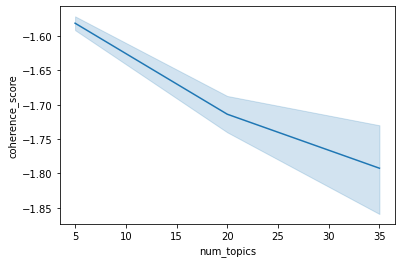

In [62]:
import seaborn as sns

ax = sns.lineplot(x='num_topics', y='coherence_score', data=topic_coherence)

Although this is not necessarily an LDA "result," coherence modeling is quite useful (when your model is good) in determining how many topics to include in your LDA topic model. Here, the highest value is the lowest number, which started at 5. At this point, it would probably be worth it to run the coherence model again with an even smaller number for the start of the iteration. 

In [64]:
def sentimentalize(stars):
    if stars == 3:
        return "neutral"
    elif stars > 3:
        return "positive"
    else: 
        return "negative"
    
yelp['sentiment'] = yelp['stars'].apply(sentimentalize)

yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,tokens,sentiment
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w,"[beware, fake, fake, fakewe, small, business, ...",negative
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA,"[come, lunch, togo, service, quick, staff, fri...",positive
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA,"[have, vegas, dozen, time, step, foot, circus,...",neutral
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ,"[go, night, close, street, party, good, actual...",negative
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA,"[35, 4, starsnot, bad, price, 1299, lunch, sen...",positive


In [66]:
doc_topics = [lda[doc] for doc in corpus]

In [67]:
def update(doc):
        d_dist = {k:0 for k in range(0,5)}
        for t in doc:
            d_dist[t[0]] = t[1]
        return d_dist
    
new_distro = [update(d) for d in doc_topics]

In [68]:
dft = pd.DataFrame.from_records(new_distro)
dft.columns = topics

In [70]:
yelp['primary_topic'] = dft.idxmax(axis=1)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

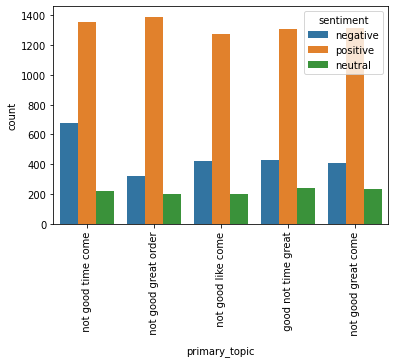

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x="primary_topic", hue="sentiment", data=yelp)
plt.xticks(rotation=90)

I created a sentiment analysis of the LSA results to show how the sentiments range between the different top 5 topics. As expected, since my model's parameters were not hyptertuned well, the distribution of sentiment aligns closely with the general distribution of ratings; that is to say, since most of the ratings were positive to begin with, and neutral ratings of 3 were the least frequent, the sentiment between the models showed the same distribution. I think yelp reviews are particularly difficult to find good topics for, since the range of descriptors are so few that the same words repeat. It would be beneficial in the future to lower the max_df parameter of the vectorizer so that it doesn't pull words that show up in the vast majority of the reviews. This would increase the salience of specific words.  

## Compare vectorization methods in the classification section

## Incorporate RandomizedSearchCV into document classification pipeline

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [76]:
vect = CountVectorizer(stop_words=stop_words, max_features=1000)

In [77]:
from sklearn.model_selection import RandomizedSearchCV

pipe = Pipeline([('vect', vect), ('clf', clf)])

parameters = {
    'vect__max_df': (0.90, 0.95),
    'vect__min_df': (.01, 0.02),

}

random_search = RandomizedSearchCV(pipe, parameters, cv=5, n_jobs=-1, verbose=1)
random_search.fit(yelp['text'], yelp['stars'])

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   46.6s finished
/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('vect',
                                              CountVectorizer(analyzer='word',
                                                              binary=False,
                                                              decode_error='strict',
                                                              dtype=<class 'numpy.int64'>,
                                                              encoding='utf-8',
                                                              input='content',
                                                              lowercase=True,
                                                              max_df=1.0,
                                                              max_features=1000,
                                                              min_df=1,
                                                          

In [78]:
vect.fit(yelp['text'])

/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=1000, min_df=1,
                ngram_range=(1, 1), preprocessor=None,
                stop_words={"'d", "'ll", "'m", "'re", "'s", "'ve", 'a', 'about',
                            'above', 'across', 'after', 'afterwards', 'again',
                            'against', 'all', 'almost', 'alone', 'along',
                            'already', 'also', 'although', 'always', 'am',
                            'among', 'amongst', 'amount', 'an', 'and',
                            'another', 'any', ...},
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [79]:
dtm2 = vect.transform(yelp['text'])

In [80]:
new = vect.transform(fake)

In [82]:
rand_pred = random_search.predict(fake)

print(rand_pred)

[5]


In [86]:
dtm2 = pd.DataFrame(dtm2.todense(), columns=vect.get_feature_names())

In [88]:
dtm2.head(10)

,00,10,100,11,12,15,20,24,25,30,...,wow,write,wrong,year,years,yelp,yes,young,yum,yummy
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
9,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## Incorporate named entity recognition into your analysis

In [ ]:
from spacy import displacy

nlp = spacy.load('en_core_web_lg') 

def ner(doc):

    doc = nlp(doc)

    return displacy.serve(doc, style='ent')

In [ ]:
yelp['ner'] = yelp['text'].apply(ner)

yelp.head()